#2-1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1NJg1Zod9AZC2a_O3O6Ote8GQ_zxZSNI9
!gdown 1HO-CTWk5ReNXJhjF0QxDvKGrQFm4Y87P
!gdown 1U7wB1Nn4Zn7NgSexQJZC7vQbWCb21G_2
!gdown 1yjH21_vRXq9mggsuJpHYreuHuUHeAlHQ


  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1NJg1Zod9AZC2a_O3O6Ote8GQ_zxZSNI9
To: /content/Normal.csv
100% 6.14M/6.14M [00:00<00:00, 58.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HO-CTWk5ReNXJhjF0QxDvKGrQFm4Y87P
To: /content/Fault1.csv
100% 4.70M/4.70M [00:00<00:00, 96.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1U7wB1Nn4Zn7NgSexQJZC7vQbWCb21G_2
To: /content/Fault2.csv
100% 4.62M/4.62M [00:00<00:00, 75.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yjH21_vRXq9mggsuJpHYreuHuUHeAlHQ
To: /content/Fault3.csv
100% 4.61M/4.61M [00:00<00:00, 70.4MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
Normal = pd.read_csv('/content/Normal.csv')

Normal=Normal.X097_DE_time
# Show the number of Normal null values in each column
null_counts1 = Normal.isnull().sum()
print("Number of Normal null values in each column:")
print(null_counts1)
Fault1 = pd.read_csv('/content/Fault1.csv')
Fault1=Fault1.X105_DE_time
# Show the number of null values in each column
null_counts2 = Fault1.isnull().sum()
print("Number of Fault1 null values in each column:")
print(null_counts2)
Fault2 = pd.read_csv('/content/Fault2.csv')
Fault2=Fault2.X118_DE_time
# Show the number of null values in each column
null_counts3 = Fault2.isnull().sum()
print("Number of Fault2 null values in each column:")
print(null_counts3)
Fault3 = pd.read_csv('/content/Fault3.csv')
Fault3=Fault3.X130_DE_time
# Show the number of null values in each column
null_counts4 = Fault3.isnull().sum()
print("Number of Fault3 null values in each column:")
print(null_counts4)

Number of Normal null values in each column:
0
Number of Fault1 null values in each column:
0
Number of Fault2 null values in each column:
0
Number of Fault3 null values in each column:
0


##2-1-A

In [4]:
Normal_data = Normal
Fault_1 = Fault1
Fault_2 = Fault2
Fault_3 = Fault3
# Extract 100 samples with length of 200
sample_length = 200
num_samples = 100
Normal_samples = []
Fault1_samples = []
Fault2_samples = []
Fault3_samples = []
# Extract samples from class Normal
for i in range(num_samples):
    np.random.seed(64)
    start_idx = np.random.randint(0, len(Normal_data) - sample_length + 1)
    sample = Normal_data[start_idx:start_idx + sample_length]
    Normal_samples.append(sample)
# Extract samples from class Fault1
for i in range(num_samples):
    np.random.seed(64)
    start_idx = np.random.randint(0, len(Fault_1) - sample_length + 1)
    sample = Fault_1[start_idx:start_idx + sample_length]
    Fault1_samples.append(sample)
# Extract samples from class Fault2
for i in range(num_samples):
    np.random.seed(64)
    start_idx = np.random.randint(0, len(Fault_2) - sample_length + 1)
    sample = Fault_2[start_idx:start_idx + sample_length]
    Fault2_samples.append(sample)
    # Extract samples from class Fault3
for i in range(num_samples):
    np.random.seed(64)
    start_idx = np.random.randint(0, len(Fault_3) - sample_length + 1)
    sample = Fault_3[start_idx:start_idx + sample_length]
    Fault3_samples.append(sample)
# Convert lists of samples to numpy arrays
Normal_samples = np.array(Normal_samples)
Fault1_samples = np.array(Fault1_samples)
Fault2_samples = np.array(Fault2_samples)
Fault3_samples = np.array(Fault3_samples)
# Create labels for the samples
Normal_labels = np.zeros((num_samples, 1))  # Assuming class Normal is labeled as 0
Fault1_labels = np.ones((num_samples, 1))   # Assuming class Fault  is labeled as 1
Fault2_labels= np.full((num_samples, 1), 2) # Assuming class Fault  is labeled as 2
Fault3_labels= np.full((num_samples, 1), 3) # Assuming class Fault  is labeled as 3
# Concatenate the data and labels for both classes
data_matrix = np.vstack((Normal_samples, Fault1_samples, Fault2_samples, Fault3_samples))
print("Data Matrix shape:")
print(data_matrix.shape)
labels = np.vstack((Normal_labels, Fault1_labels, Fault2_labels, Fault3_labels))
print("labels Matrix:")
#print(labels.shape)
main_matrix = np.hstack((data_matrix, labels))
print("data & label matrix:")
print(main_matrix)

Data Matrix shape:
(400, 200)
labels Matrix:
data & label matrix:
[[-0.15583569 -0.18483323 -0.15959077 ... -0.07468431 -0.06133292
   0.        ]
 [-0.15583569 -0.18483323 -0.15959077 ... -0.07468431 -0.06133292
   0.        ]
 [-0.15583569 -0.18483323 -0.15959077 ... -0.07468431 -0.06133292
   0.        ]
 ...
 [-0.01502525  0.28629192 -0.05360359 ...  0.62781178 -0.24974401
   3.        ]
 [-0.01502525  0.28629192 -0.05360359 ...  0.62781178 -0.24974401
   3.        ]
 [-0.01502525  0.28629192 -0.05360359 ...  0.62781178 -0.24974401
   3.        ]]


##2-1-B

In [5]:
#create features
mean_values = np.mean(data_matrix, axis=1)
std_dev_values = np.std(data_matrix, axis=1)
peak_values = np.max(np.abs(data_matrix), axis=1)
rms_value = np.sqrt(np.mean(data_matrix**2, axis=1))
crest_factor = peak_values / rms_value
peak_to_peak_value=np.max(data_matrix, axis=1)-np.min(data_matrix, axis=1)
Abs_Mean_value=np.mean(np.abs(data_matrix), axis=1)
Impulse_Factor=peak_values/Abs_Mean_value
# Concatenate mean and standard deviation as features
features = np.column_stack((mean_values, std_dev_values, peak_values, rms_value, crest_factor, peak_to_peak_value, Abs_Mean_value, Impulse_Factor))
# Create DataFrame
Data = pd.DataFrame(features, columns=['Mean', 'Standard Deviation','Peak', 'RMS', 'Crest Factor', 'Peak to Peak', 'Absolute Mean', 'Impulse Factor'])
print(Data)

         Mean  Standard Deviation      Peak       RMS  Crest Factor  \
0    0.016739            0.086732  0.202148  0.088333      2.288487   
1    0.016739            0.086732  0.202148  0.088333      2.288487   
2    0.016739            0.086732  0.202148  0.088333      2.288487   
3    0.016739            0.086732  0.202148  0.088333      2.288487   
4    0.016739            0.086732  0.202148  0.088333      2.288487   
..        ...                 ...       ...       ...           ...   
395  0.025226            0.637517  2.586373  0.638016      4.053774   
396  0.025226            0.637517  2.586373  0.638016      4.053774   
397  0.025226            0.637517  2.586373  0.638016      4.053774   
398  0.025226            0.637517  2.586373  0.638016      4.053774   
399  0.025226            0.637517  2.586373  0.638016      4.053774   

     Peak to Peak  Absolute Mean  Impulse Factor  
0        0.386982       0.075379        2.681759  
1        0.386982       0.075379        2.681

##2-1-C

In [6]:
Labeled_Data=np.hstack((Data, labels))
np.random.seed(64)
np.random.shuffle(Labeled_Data)
print(Labeled_Data)
# Remove the header from the variables
data = Data.values
label = labels
# Split the data into train/validation/test sets
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.15, random_state=64)
train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size=0.15, random_state=64)
# Print shape of each set
print(f"train_data shape: {train_data.shape}")
print(f"val_data shape: {val_data.shape}")
print(f"test_data shape: {test_data.shape}")
print(f"train_label shape: {train_label.shape}")
print(f"val_label shape: {val_label.shape}")
print(f"test_label shape: {test_label.shape}")

[[0.02522618 0.63751722 2.58637335 ... 0.40691218 6.35609712 3.        ]
 [0.0167393  0.08673215 0.20214831 ... 0.075379   2.68175906 0.        ]
 [0.01372739 0.26633675 0.90297689 ... 0.19650265 4.59524026 1.        ]
 ...
 [0.0167393  0.08673215 0.20214831 ... 0.075379   2.68175906 0.        ]
 [0.01372739 0.26633675 0.90297689 ... 0.19650265 4.59524026 1.        ]
 [0.01372739 0.26633675 0.90297689 ... 0.19650265 4.59524026 1.        ]]
train_data shape: (289, 8)
val_data shape: (51, 8)
test_data shape: (60, 8)
train_label shape: (289, 1)
val_label shape: (51, 1)
test_label shape: (60, 1)


##2-1-D

In [7]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)
test_data = scaler.transform(test_data)

#2-2

In [8]:
from keras.utils import to_categorical
x_train = train_data
y_train = train_label.ravel()
x_test = test_data
y_test = test_label.ravel()
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)
print(x_train.shape, y_train.shape)

(289, 8) (289, 4)


##MLP with 2 hidden layer using keras

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense
keras.utils.set_random_seed(64)
np.random_state=64
np.random.seed(64)

model = Sequential()
# Add the first hidden layer with 8 neurons and relu activation function
model.add(Dense(9, activation='relu', input_shape=(x_train.shape[1],)))
# Add the second hidden layer with 4 neurons and relu activation function
model.add(Dense(5, activation='relu'))
# Add an output layer with 4 neuron and softmax activation function
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 81        
                                                                 
 dense_1 (Dense)             (None, 5)                 50        
                                                                 
 dense_2 (Dense)             (None, 4)                 24        
                                                                 
Total params: 155 (620.00 Byte)
Trainable params: 155 (620.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
keras.utils.set_random_seed(64)
initial_lr = 0.05
optimizer = Adam(learning_rate=initial_lr)
model.compile(optimizer=optimizer,
              loss='BinaryCrossentropy',
              metrics=['accuracy'])
np.random_state=64
np.random.seed(64)
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=50,
                      callbacks=[reduce_lr, early_stop, checkpoint])

Epoch 1/100
6/6 [==============================] - 2s 54ms/step - loss: 0.6004 - accuracy: 0.3346 - val_loss: 0.5180 - val_accuracy: 0.3793 - lr: 0.0500
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.4546 - accuracy: 0.3500 - val_loss: 0.4178 - val_accuracy: 0.4828 - lr: 0.0500
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3827 - accuracy: 0.5077 - val_loss: 0.3616 - val_accuracy: 0.4828 - lr: 0.0500
Epoch 4/100
1/6 [====>.........................] - ETA: 0s - loss: 0.3798 - accuracy: 0.4400

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 15ms/step - loss: 0.3324 - accuracy: 0.5923 - val_loss: 0.2853 - val_accuracy: 0.8621 - lr: 0.0500
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.2757 - accuracy: 0.7423 - val_loss: 0.2583 - val_accuracy: 0.8621 - lr: 0.0500
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.2500 - accuracy: 0.7192 - val_loss: 0.2417 - val_accuracy: 0.6207 - lr: 0.0500
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 0.2023 - accuracy: 0.7731 - val_loss: 0.1817 - val_accuracy: 0.8621 - lr: 0.0500
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.1808 - accuracy: 0.7500 - val_loss: 0.1917 - val_accuracy: 0.6207 - lr: 0.0500
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1713 - accuracy: 0.7654 - val_loss: 0.1846 - val_accuracy: 0.6207 - lr: 0.0500
Epoch 10/100
6/6 [==============================] - 0s 11ms/step - loss: 0.1637 - accuracy: 0.85

In [12]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Model accuracy on test data: {accuracy:.4f}")

Model accuracy on test data: 1.0000


In [13]:
#Evaluate the model
loss = model.evaluate(x_test , y_test)

2/2 [==============================] - 0s 12ms/step - loss: 4.3486e-04 - accuracy: 1.0000


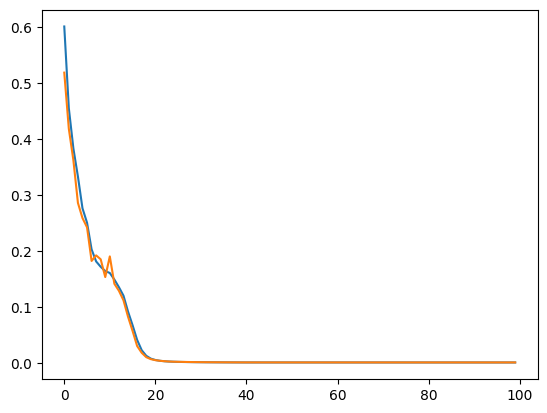

In [14]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss


##MLP with 2 hidden layer using Sklearn

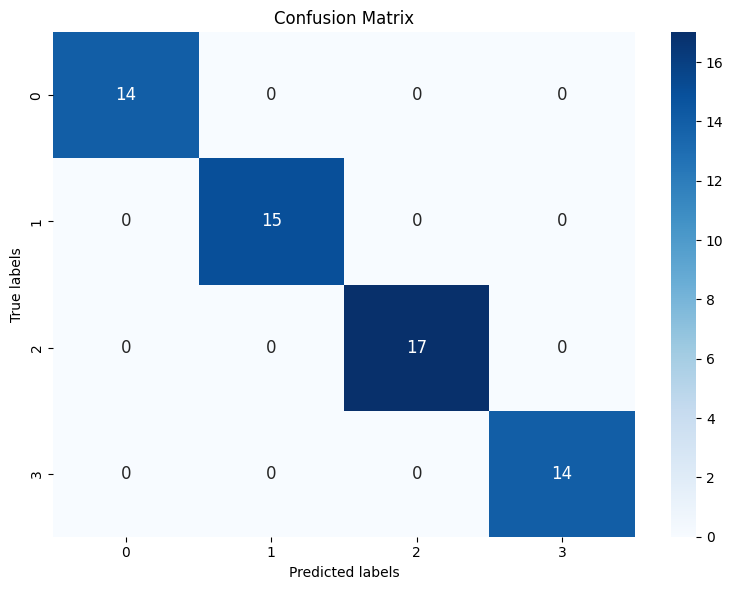

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        15
         2.0       1.00      1.00      1.00        17
         3.0       1.00      1.00      1.00        14

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

x_train = train_data
y_train = train_label.ravel()
x_test = test_data
y_test = test_label.ravel()
# Assuming you've trained your model already
model = MLPClassifier(hidden_layer_sizes=(9, 5), activation='relu', solver='adam',
                      batch_size=50, learning_rate_init=0.05,
                       max_iter=100, random_state=64,
                      early_stopping=True, validation_fraction=0.1)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#2-3

## Optimizer changed

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense
keras.utils.set_random_seed(64)
np.random_state=64
np.random.seed(64)
from keras.utils import to_categorical
x_train = train_data
y_train = train_label.ravel()
x_test = test_data
y_test = test_label.ravel()
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

model = Sequential()
# Add the first hidden layer with 8 neurons and relu activation function
model.add(Dense(9, activation='relu', input_shape=(x_train.shape[1],)))
# Add the second hidden layer with 4 neurons and relu activation function
model.add(Dense(5, activation='relu'))
# Add an output layer with 4 neuron and softmax activation function
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 81        
                                                                 
 dense_4 (Dense)             (None, 5)                 50        
                                                                 
 dense_5 (Dense)             (None, 4)                 24        
                                                                 
Total params: 155 (620.00 Byte)
Trainable params: 155 (620.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
keras.utils.set_random_seed(64)
initial_lr = 0.05
optimizer = Adagrad(learning_rate=initial_lr)
model.compile(optimizer=optimizer,
              loss='BinaryCrossentropy',
              metrics=['accuracy'])
np.random_state=64
np.random.seed(64)
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=50,
                      callbacks=[reduce_lr, early_stop, checkpoint])

Epoch 1/100
6/6 [==============================] - 1s 77ms/step - loss: 0.6666 - accuracy: 0.2500 - val_loss: 0.6520 - val_accuracy: 0.3793 - lr: 0.0500
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 0.6404 - accuracy: 0.5077 - val_loss: 0.6307 - val_accuracy: 0.3793 - lr: 0.0500
Epoch 3/100
1/6 [====>.........................] - ETA: 0s - loss: 0.6250 - accuracy: 0.5600

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 21ms/step - loss: 0.6177 - accuracy: 0.5077 - val_loss: 0.6118 - val_accuracy: 0.3793 - lr: 0.0500
Epoch 4/100
6/6 [==============================] - 0s 19ms/step - loss: 0.5981 - accuracy: 0.5077 - val_loss: 0.5937 - val_accuracy: 0.3793 - lr: 0.0500
Epoch 5/100
6/6 [==============================] - 0s 24ms/step - loss: 0.5787 - accuracy: 0.5077 - val_loss: 0.5780 - val_accuracy: 0.3793 - lr: 0.0500
Epoch 6/100
6/6 [==============================] - 0s 24ms/step - loss: 0.5621 - accuracy: 0.5077 - val_loss: 0.5637 - val_accuracy: 0.3793 - lr: 0.0500
Epoch 7/100
6/6 [==============================] - 0s 22ms/step - loss: 0.5468 - accuracy: 0.5077 - val_loss: 0.5490 - val_accuracy: 0.3793 - lr: 0.0500
Epoch 8/100
6/6 [==============================] - 0s 34ms/step - loss: 0.5317 - accuracy: 0.5077 - val_loss: 0.5343 - val_accuracy: 0.3793 - lr: 0.0500
Epoch 9/100
6/6 [==============================] - 0s 25ms/step - loss: 0.5162 - accuracy: 0.5

In [18]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Model accuracy on test data: {accuracy:.4f}")

Model accuracy on test data: 0.7167


In [19]:
#Evaluate the model
loss = model.evaluate(x_test , y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.3282 - accuracy: 0.7167


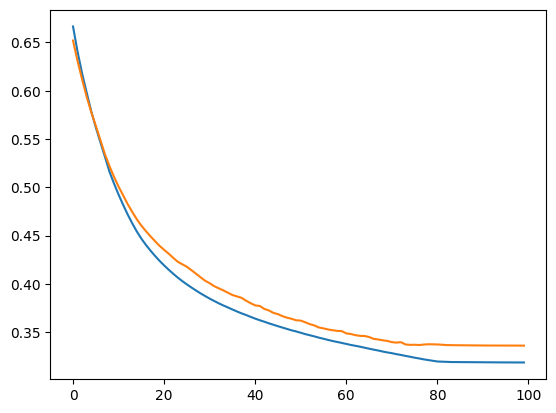

In [20]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

## Loss Function changed

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense
keras.utils.set_random_seed(64)
np.random_state=64
np.random.seed(64)
from keras.utils import to_categorical
x_train = train_data
y_train = train_label.ravel()
x_test = test_data
y_test = test_label.ravel()
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

model = Sequential()
# Add the first hidden layer with 8 neurons and relu activation function
model.add(Dense(9, activation='relu', input_shape=(x_train.shape[1],)))
# Add the second hidden layer with 4 neurons and relu activation function
model.add(Dense(5, activation='relu'))
# Add an output layer with 4 neuron and softmax activation function
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 9)                 81        
                                                                 
 dense_7 (Dense)             (None, 5)                 50        
                                                                 
 dense_8 (Dense)             (None, 4)                 24        
                                                                 
Total params: 155 (620.00 Byte)
Trainable params: 155 (620.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
keras.utils.set_random_seed(64)
initial_lr = 0.05
optimizer = Adam(learning_rate=initial_lr)
model.compile(optimizer=optimizer,
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])
np.random_state=64
np.random.seed(64)
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=50,
                      callbacks=[reduce_lr, early_stop, checkpoint])

Epoch 1/100
6/6 [==============================] - 1s 55ms/step - loss: 1.2392 - accuracy: 0.4423 - val_loss: 1.0869 - val_accuracy: 0.3793 - lr: 0.0500
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.9980 - accuracy: 0.4500 - val_loss: 0.9499 - val_accuracy: 0.4828 - lr: 0.0500
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 0.8871 - accuracy: 0.5500 - val_loss: 0.8528 - val_accuracy: 0.6207 - lr: 0.0500
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.7728 - accuracy: 0.7654 - val_loss: 0.7317 - val_accuracy: 0.6207 - lr: 0.0500
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6739 - accuracy: 0.7654 - val_loss: 0.6598 - val_accuracy: 0.6207 - lr: 0.0500
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6044 - accuracy: 0.7654 - val_loss: 0.6055 - val_accuracy: 0.6207 - lr: 0.0500
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.5461 - a

In [23]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Model accuracy on test data: {accuracy:.4f}")

Model accuracy on test data: 0.7167


In [24]:
#Evaluate the model
loss = model.evaluate(x_test , y_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.3919 - accuracy: 0.7167


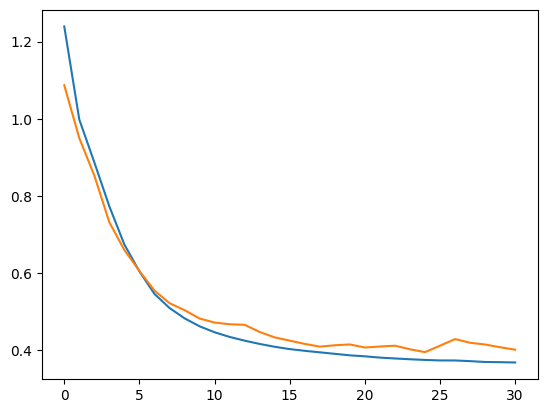

In [25]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

## Optimizer & Loss Function changed

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense
keras.utils.set_random_seed(64)
np.random_state=64
np.random.seed(64)
from keras.utils import to_categorical
x_train = train_data
y_train = train_label.ravel()
x_test = test_data
y_test = test_label.ravel()
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

model = Sequential()
# Add the first hidden layer with 8 neurons and relu activation function
model.add(Dense(9, activation='relu', input_shape=(x_train.shape[1],)))
# Add the second hidden layer with 4 neurons and relu activation function
model.add(Dense(5, activation='relu'))
# Add an output layer with 4 neuron and softmax activation function
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 9)                 81        
                                                                 
 dense_10 (Dense)            (None, 5)                 50        
                                                                 
 dense_11 (Dense)            (None, 4)                 24        
                                                                 
Total params: 155 (620.00 Byte)
Trainable params: 155 (620.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
keras.utils.set_random_seed(64)
initial_lr = 0.05
optimizer = Adagrad(learning_rate=initial_lr)
model.compile(optimizer=optimizer,
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])
np.random_state=64
np.random.seed(64)
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=50,
                      callbacks=[reduce_lr, early_stop, checkpoint])

Epoch 1/100
6/6 [==============================] - 1s 57ms/step - loss: 1.3208 - accuracy: 0.4423 - val_loss: 1.2799 - val_accuracy: 0.2414 - lr: 0.0500
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 1.2525 - accuracy: 0.2500 - val_loss: 1.2262 - val_accuracy: 0.2414 - lr: 0.0500
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 1.1936 - accuracy: 0.2500 - val_loss: 1.1668 - val_accuracy: 0.2414 - lr: 0.0500
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 1.1414 - accuracy: 0.2500 - val_loss: 1.1234 - val_accuracy: 0.2414 - lr: 0.0500
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 1.0982 - accuracy: 0.2500 - val_loss: 1.0909 - val_accuracy: 0.2414 - lr: 0.0500
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: 1.0664 - accuracy: 0.2500 - val_loss: 1.0580 - val_accuracy: 0.2414 - lr: 0.0500
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 1.0392 - a

In [28]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Model accuracy on test data: {accuracy:.4f}")

Model accuracy on test data: 0.7167


In [29]:
#Evaluate the model
loss = model.evaluate(x_test , y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.5582 - accuracy: 0.7167


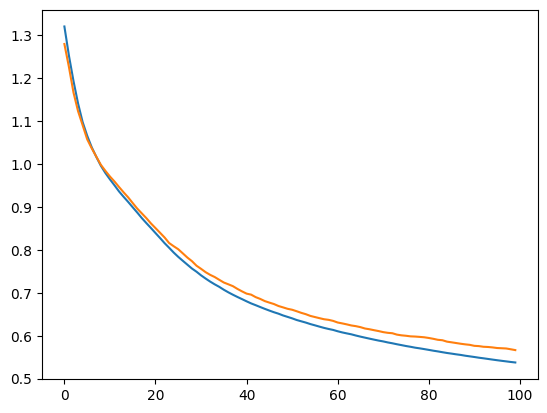

In [30]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

#2-4

In [31]:
x = Data.values
y = labels
unique, counts = np.unique(y, return_counts=True)
print("Class counts:", dict(zip(unique, counts)))
y = to_categorical(y, num_classes=4)

Class counts: {0.0: 100, 1.0: 100, 2.0: 100, 3.0: 100}


In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
# Set random seed for reproducibility
keras.utils.set_random_seed(64)
np.random.seed(64)
np.random_state=64

#  model definition
def create_model():
    model = Sequential()
    model.add(Dense(9, activation='relu', input_shape=(x.shape[1],)))
    model.add(Dense(5, activation='relu'))  # Second hidden layer
    model.add(Dense(4, activation='softmax'))  # Output layer with 4 classes
    initial_lr = 0.05
    optimizer = Adam(learning_rate=initial_lr)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

kf = KFold(n_splits=5)
Acc = []
for train_index, test_index in kf.split(x):
    X_train_kf, X_test_kf = x[train_index], x[test_index]
    y_train_kf, y_test_kf = y[train_index], y[test_index]

    # Create a new model instance for each fold
    model = create_model()
    # Train the model
    model.fit(X_train_kf, y_train_kf, epochs=100, verbose=0, validation_split=0.1, batch_size=50)
    # Predict on the test fold
    y_pred = model.predict(X_test_kf)
    # Convert predictions from probabilities to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_kf_classes = np.argmax(y_test_kf, axis=1)
    # Compute accuracy and store it
    Acc.append(accuracy_score(y_test_kf_classes, y_pred_classes))

Acc = np.array(Acc)
print(Acc)
print('mean Acc', Acc.mean())


3/3 [==============================] - 0s 5ms/step


3/3 [==============================] - 0s 5ms/step
[1. 1. 1. 1. 0.]
mean Acc 0.8
